### heatmap: Seaborn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
cars = sns.load_dataset("mpg")

cars.shape

(398, 9)

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Basics

In [5]:
cars.groupby(["origin"])["cylinders"].value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: count, dtype: int64

In [6]:
(cars.groupby(["origin"])["cylinders"]
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


In [7]:
origin_cyl = (cars
             .groupby("origin")
             .cylinders.value_counts()
             .unstack()
             .fillna(0)
             );

<Axes: xlabel='cylinders', ylabel='origin'>

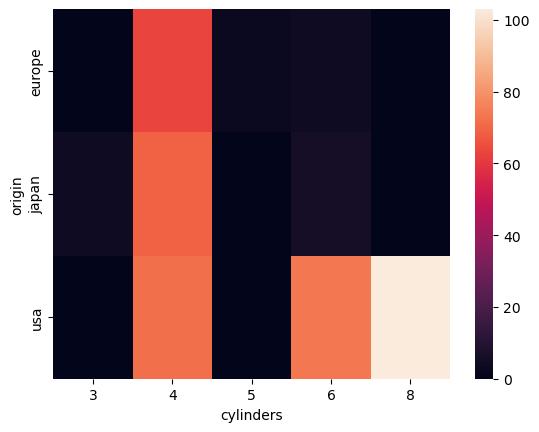

In [8]:
sns.heatmap(origin_cyl)

In [9]:
test_array = np.array([[1, 2], [3, 4]])

In [10]:
test_array

array([[1, 2],
       [3, 4]])

### Transpose

In [11]:
origin_cyl_t = origin_cyl.T

<Axes: xlabel='origin', ylabel='cylinders'>

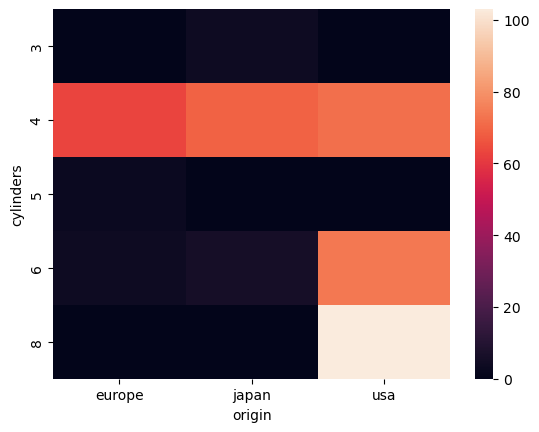

In [12]:
sns.heatmap(origin_cyl_t)

### Correlatioin

In [23]:
numeric_cols = cars.select_dtypes(include=["float64", "int64"])

In [24]:
numeric_cols.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

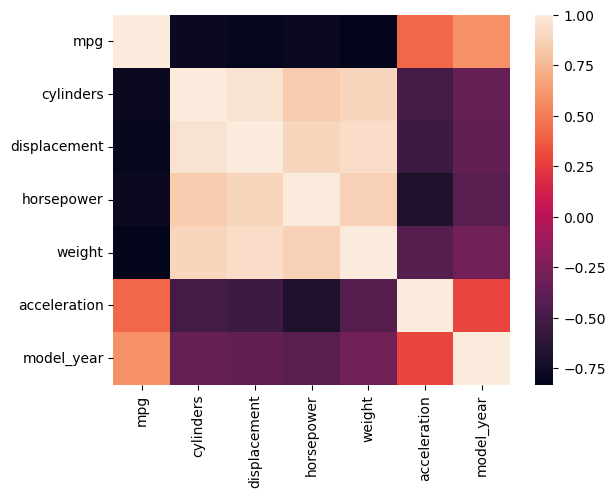

In [25]:
sns.heatmap(numeric_cols.corr())

### Color Palette

<Axes: >

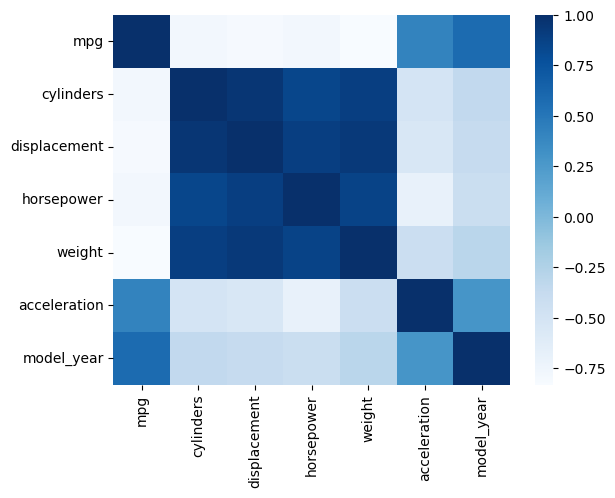

In [16]:
sns.heatmap(numeric_cols.corr(), cmap="Blues")

#### Now let's try  Diverging color palette

<Axes: >

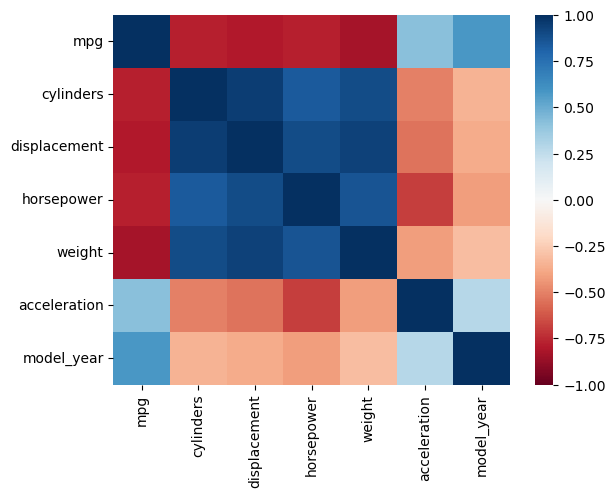

In [17]:
sns.heatmap(numeric_cols.corr(), cmap="RdBu", center = 0, vmin=-1, vmax=1)

### Annotation

<Axes: xlabel='cylinders', ylabel='origin'>

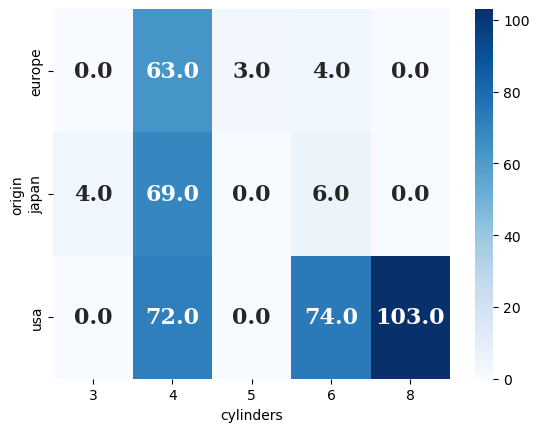

In [18]:
sns.heatmap(origin_cyl, cmap="Blues",
            annot=True,
            fmt=".1f",
           annot_kws = {
               "fontsize":16,
               "fontweight":"bold",
               "fontfamily":"serif",
#                "color":"black"
           })

### Styling

#### linewidth

<Axes: >

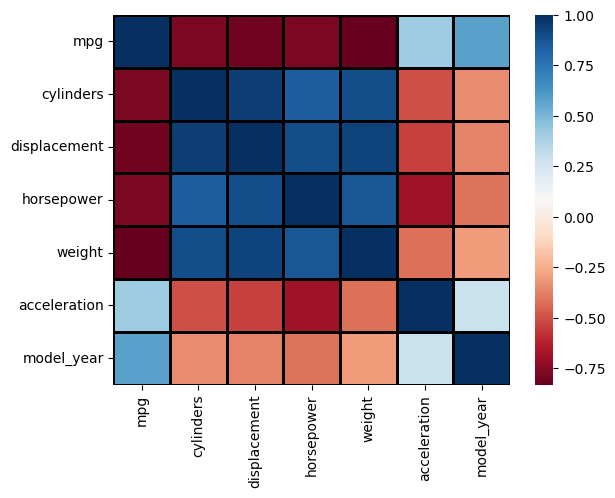

In [27]:
sns.heatmap(numeric_cols.corr(), 
            cmap="RdBu", 
            linewidth=1,
           linecolor="black"
           );

In [28]:
labels = ["Mpg", "Cylinders", "Displacement", "Horsepower",
          "Weight", "Acceleration", "Model Year"]

<Axes: >

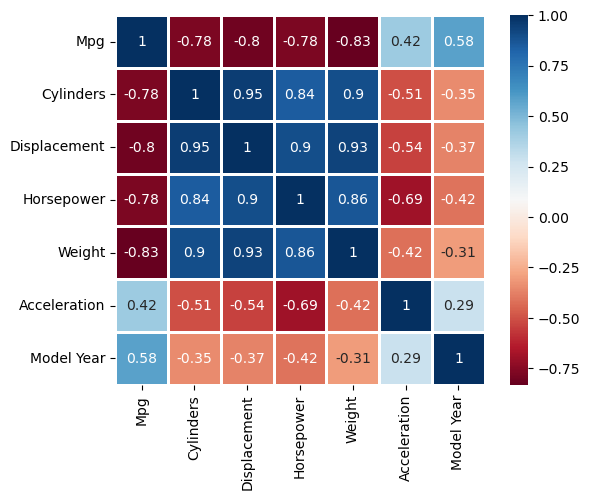

In [37]:
sns.heatmap(numeric_cols.corr(), 
            cmap="RdBu",
            linewidth=1,
            annot=True,
            square=True,
#             xticklabels=False
            xticklabels = labels, 
            yticklabels = labels
           )